# Day 2: Building Neural Networks from Scratch in PyTorch

<h5>Goals for the Day</h5>

* Understand how a neural network works internally

* Implement forward pass, loss, backward pass, and weight updates

* Build a Linear Regression or Binary Classification model without using torch.nn or torch.optim

<h5>Part 1: Linear Regression — Manual Implementation</h5>

* Problem:

We want to fit a line to the data `y = 2x + 3 + noise`

In [43]:
import torch
import random
import matplotlib.pyplot as plt

#### Generate Synthetic Dataset

In [44]:
#Generate fake dataset
true_W=2
true_b=3
N=100

X=torch.randn(N,1)
y=true_W*X+true_b+0.5*torch.randn(N,1) #y=2x+3+Noise

##### Initialize Model Parameters

In [45]:
# Random Initial Weights
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)


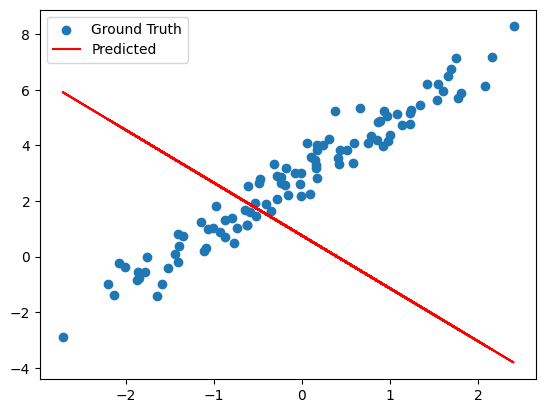

In [46]:
plt.scatter(X.numpy(),y.numpy(),label="Ground Truth")
plt.plot(X.numpy(),(X*w+b).detach().numpy(),color='red',label='Predicted')
plt.legend()
plt.show()

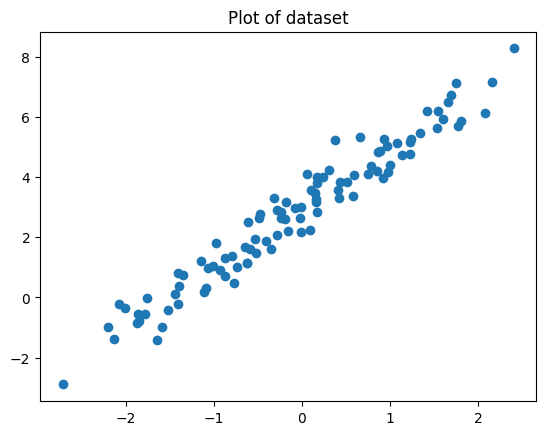

In [47]:
#Plotting the generated dataset
plt.title("Plot of dataset")
plt.scatter(X,y)
plt.show()

#### Training Loop

In [ ]:
lr=0.1
epochs=40
losses=[]

for epoch in range(epochs):
    #Forward Pass
    y_pred=w*X+b
    #Loss calculation
    MSE_Loss=((y_pred-y)**2).mean()
    # Backward pass
    MSE_Loss.backward()
    
    #Update weights manually
    with torch.no_grad():
        w-=lr*w.grad
        b-=lr*b.grad
        
        #Zero gradients for next step
        w.grad.zero_()
        b.grad.zero_()
        
    losses.append(MSE_Loss.item())
    if(epoch%5==0):
        print(f"Values of parameters at epoch {epoch+1}:")
        print("=========================================")
        print(f"Weights:{w.item():.4f} and Bias:{b.item():.4f}")
        print(f"Loss value:{MSE_Loss.item():.4f}")
    
    
    

Values of parameters at epoch 1:
Weights:-0.9131 and Bias:1.1330
Loss value:23.3455
Values of parameters at epoch 6:
Weights:1.2812 and Bias:2.2719
Loss value:1.8902
Values of parameters at epoch 11:
Weights:1.7853 and Bias:2.7067
Loss value:0.4147
Values of parameters at epoch 16:
Weights:1.9059 and Bias:2.8635
Loss value:0.2898
Values of parameters at epoch 21:
Weights:1.9362 and Bias:2.9184
Loss value:0.2776
Values of parameters at epoch 26:
Weights:1.9442 and Bias:2.9373
Loss value:0.2763
Values of parameters at epoch 31:
Weights:1.9465 and Bias:2.9437
Loss value:0.2761
Values of parameters at epoch 36:
Weights:1.9471 and Bias:2.9459
Loss value:0.2761


#### Plotting Loss curve

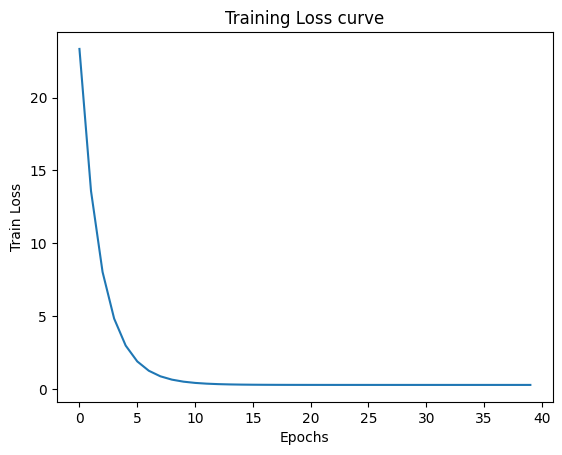

In [49]:
plt.title("Training Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.plot(losses)
plt.show()

#### Plot the original data and fitted line

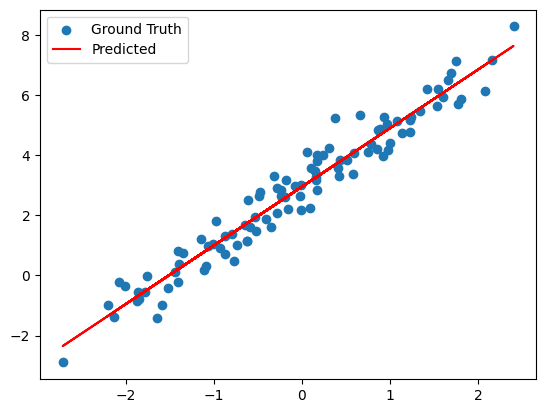

In [50]:
plt.scatter(X.numpy(),y.numpy(),label="Ground Truth")
plt.plot(X.numpy(),(X*w+b).detach().numpy(),color='red',label='Predicted')
plt.legend()
plt.show()

### Explanation of each term:

<b><h4>Forward Pass</h4></b>
<hr>
<b>y_pred = X * w + b</b><br>
<b>Meaning:</b>
This is the prediction step — using your current weights to estimate the output y_pred based on inputs X.
<h5>Goal:</h5>
Simulate how a real model makes predictions.
<hr>

<b><h4>Loss</h4></b>
<hr>
<b>loss = ((y_pred - y) ** 2).mean()</b><br>

<h5>Goal:</h5>
A small loss = model is doing well
A big loss = model is off target
<hr>

<b><h4>Backward Pass</h4></b>
<hr>
<b>loss.backward()</b><br>
<b>Meaning:</b>
This triggers autograd, PyTorch’s magic engine, to compute how the loss changes if you change the weights (w, b).

![alt text](image.png)
<h5>Goal:</h5>
To figure out in which direction to move the weights so that the loss becomes smaller next time.
<hr>

<b><h4>Weight Update (Manual)</h4></b>
<hr>
<b>

``` w -= lr * w.grad ``` <br>

``` b -= lr * b.grad ```</b><br>
<b>Meaning:</b>
You are moving the weights a little in the direction that reduces the loss, based on gradient values.
<br>
<b> Learning rule:</b>
<i>θ:=θ−η⋅∇θ​</i>
Where:

* θ = parameter (like w or b)

* η = learning rate (step size)

* ∇θ = gradient w.r.t that parameter
<h5>Goal:</h5>
Make the model better with each iteration.
<hr>

`torch.no_grad()`: No Grad Block:

``` with torch.no_grad():
    w -= lr * w.grad
```
<br>
<b>Meaning:</b><br>
This tells PyTorch: "Don't track these operations".
<br><br>
<b>Why? Because:</b>

* You don’t want .grad to be computed for weight updates themselves

* Otherwise, PyTorch will get confused and create unnecessary computation graphs

<h5>Goals:</h5>
Keep your computation graph clean and avoid errors.

`zero_grad():` Zeroing the Gradients

```
w.grad.zero_()
b.grad.zero_()
```
<br>
<h5><b>Meaning:</b></h5>
PyTorch accumulates gradients by default. If you don’t clear them, gradients will stack up across epochs.
<br>
---------------------------<br>
Epoch 1:

* w.grad = dw1

Epoch 2:

* w.grad = dw1 + dw2  ← BAD

-> <b> So we clear them manually every iteration.</b>
<br>
<h5>Goal:</h5>

* Prevent gradient accumulation across steps. Always start fresh each epoch.


In [52]:
w = torch.tensor([1.0], requires_grad=True)
print(w.is_leaf)  # True

loss = (w * 2 - 4)**2
loss.backward()

# Unsafe update (without no_grad)
w = w - 0.1 * w.grad
print(w.is_leaf)  # False 😢

# Safe update
w = torch.tensor([1.0], requires_grad=True)
loss = (w * 2 - 4)**2
loss.backward()

with torch.no_grad():
    w -= 0.1 * w.grad
print(w.is_leaf)  # True 😊


True
False
True
